# SVM (Support Vector Machine)

- 장점 : 중소규모의 비선형 데이터 셋에 효과적 
- 단점 : 큰 데이터 셋에서 사용하기 어려움 


---

# 1. 선형 SVM 분류 

## 1) 라지 마진 분류 
- SVM 분류기 : `분류`를 하기 위한 분류 
- `마진` : SVM `분류기`의 폭 
- `서포트 벡터` : 마진을 결정하는 샘플 

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

- 선형 분류 : 결정 경계가 제대로 분류를 못하고 있음 
    - 결정 경계가 샘플과 너무 가까움 -> 제대로 분류하지 못함 

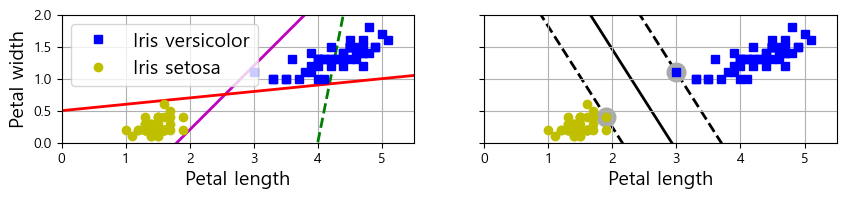

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=10**9)
svm_clf.fit(X, y)

# 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

\* 주의 사항 : SVM은 특성의 스케일에 민감

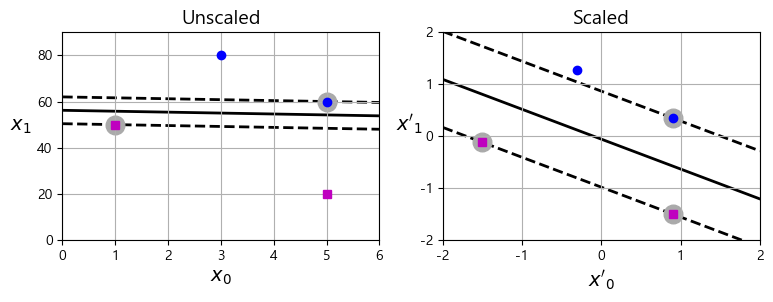

In [11]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()
plt.show()

## 2) 소프트 마진 분류 
### 하드 마진 분류 
> 모든 샘플이 마진 바깥으로 올바르게 분류되어 있어야함 

#### 하드 마진 분류의 문제 
- 데이터가 `선형`적이여야만 함 
- `이상치`에 민감함 

### 소프트 마진 분류의 정의 
> `마진 오류`와 마진의 폭을 최대한 넓게 유지하는 것 사이 균형을 잡은 유연한 모델 
- `마진 오류` : 샘플이 분류기 중간 혹은 반대 쪽에 있는 경우 


- 예시 : 선형 SVM을 이용해 붓꽃 타겟 2 (Iris-Virginica) 맞추기 
  - 사이킷런 버전 1.5 부터 `dual`의 default 값이 `auto`로 변경 

In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

### 붓꽃 데이터를 Dataframe으로 생성 
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) 

### 정규화 + 선형 SVM 생성
### dual의 기본값이 True에서 auto로 변경 -> 명시적으로 True로 변경 
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))

### 학습 진행 
svm_clf.fit(X, y)

## # 예측 실행  - 2번 타겟인지 확인 
X_new = [[5.5, 1.7], [5.0, 1.5]]
print("예측 값 : ", svm_clf.predict(X_new))

예측 값 :  [ True False]


####  예측에 사용한 점수
- 샘플과 결정 경계 사이의 거리 
- `LinearSVC` 클래스는 `predicct_proba()` 매서드가 없음 
  - 단, `SVC` 클래스에는 `probability=True`로 설정해서 추정확률을 위한 학습을 추가적으로 진행 -> 훈련 속도가 느려짐 
    - 대신 `predict_proba() 및 predict_log_proba()` 사용 가능 

In [15]:
print("결정 경계와의 거리 : ",svm_clf.decision_function(X_new))

결정 경계와의 거리 :  [ 0.66163411 -0.22036063]


#### 사이킷런의 SVM 구현 
- 사이킷 런에서 SVM 모델 생성 시, 규제 하이퍼파라미터 `C`를 포함한 여러 파라미터 지정 가능 
  - 규제 `C` 감소 : 마진(도로의 폭)이 커짐 -> `마진 오류` 상승 
  -> 과도하게 훈련세트에 가깝지 않아짐 -> `과대 적합` 위험 감소 
  \* 너무 많이 줄이면 오히려 `과소 적합` 


- 예시 `C=100` 모델과 `C=1` 모델 비교
  - C=1이 일반화가 잘됨 

C:\Users\skssk\AppData\Local\Temp\ipykernel_20164\2398327403.py:23: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
C:\Users\skssk\AppData\Local\Temp\ipykernel_20164\2398327403.py:24: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()


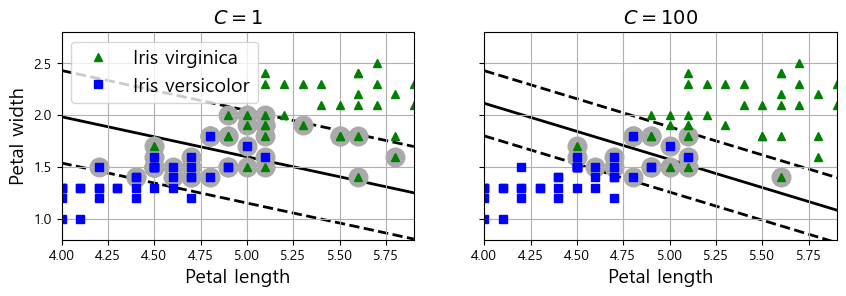

In [16]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# 스케일링되지 않은 파라미터로 변환
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기(LinearSVC는 이 작업을 자동으로 수행하지 않음)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.show()

# 2. 비선형 SVM 분류

## 0) 다항분류로 비선형 데이터 분류하기 
- 비선형 데이터를 다루는 방법은 : 다항 특성과 같은 특성을 더 추가하는 것 -> 선형적으로 구분되는 데이터셋을 만들 수 있음 
    - 선형적으로 구분하지 못하던 데이터에 $x_2=(x_1)^2$를 추가하여 2차원 데이터 셋으로 만듦 
    - 선형적으로 구분 가능 

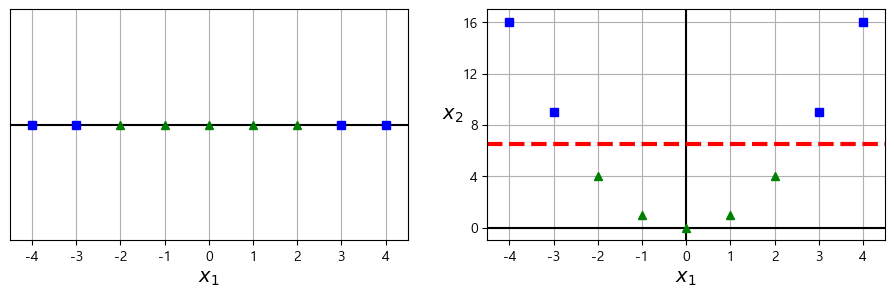

In [17]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

### PolynominalFeature를 이용해 다항식으로 만들기 
- `moons` 데이터 셋 이용 

In [18]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

#훈련 데이터 셋과 테스트 데이터 셋 만들기 
### 노이즈 0.15 , 샘플 100개 
X,y = make_moons(n_samples=100, noise=0.15, random_state=42)

### 파이프 라인 마늘기 
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3), ### 3차항으로 만듦
    StandardScaler(), ### 정규화
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)

###
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

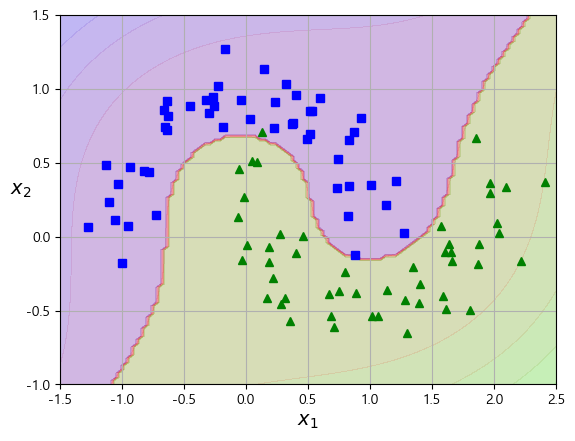

In [19]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## 1) 다항식 커널 

### 다항 특성 추가의 문제 
- 낮은 다항식은 복잡한 데이터 셋 표현을 못함 
- 높은 다항식은 모델을 느리게 만듦 

### 커널 트릭 
- 수학적 기교를 이용해 `실제 특성`을 추가하지 않고 `매우 높은 차수의 다항 특성을 ` 많이 추가한거 같은 결과를 얻게함 
- `SVC`의 클래스에 구현 

- 예시 : 3차 다항식 커널을 이용한 SVM 분류기 훈련 
  - `coef0` : 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절하는 매개 변수

In [20]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly",degree=3,coef0=1,C=5))

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

- 예시 : 3차 다항식 VS 10차 다항식 
  - 과대적합 -> 다항식 차수 감소 필요 
 - 과소적합 -> 다항식 차수 증가 필요 

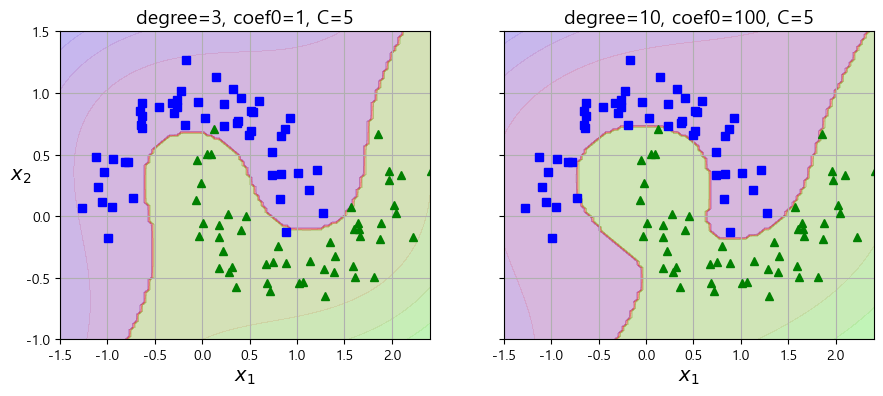

In [22]:
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")
plt.show()

## 유사도 특성
- 비선형 특징을 다루는 방법

### 유사도 함수 
- 각 샘플이 특정 `랜드마크`와 얼마나 닮았는지 측정하는 함수 

####  예시 
##### 유사도 함수 정의 
  - 앞의 데이터셋에 `랜드마크` $x_1=-2 , x_1=1$를 추가 
  - 가우스 `방사기저함수 (RBF)` $\gamma = 0.3$
  - 함수의 값은 0(랜드마크에서 멈) ~ 1 (랜드마크와 가까움)

##### 유사도 계산 
- 샘플 예시 : $x_1 = -1$ 
- 첫 번째 랜드마크와 거리 : 1 
- 두 번째 랜드마크와 거리 : 2
- 새로 만든 특성은 
    - $x_2 = exp(-0.3 \times 1^2) \approx 0.7$
    - $x_3 = exp(-0.3 \times 2^2) \approx 0.3$

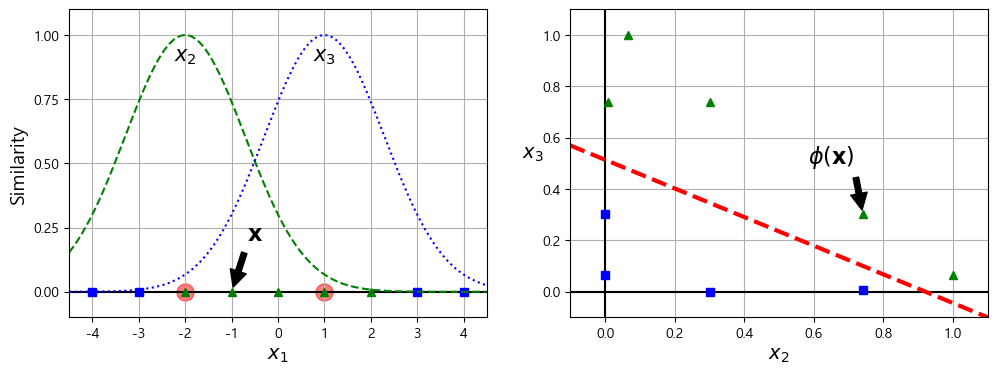

In [24]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)
plt.show()

#### 랜드마크의 선택 
##### 방법1 : 모든 훈련 샘플을 랜드마크로 사용
- 장점 : 차원이 매우 커져서 변환된 훈련 세트가 선형적으로 구분 될 가능성이 높음 
- 단점 : 훈련세트가 매우 크면 동일한 크기의 아주 많은 특성이 만들어짐 

## 가우스 RBF 커널 
- 유사도 특성 방식은 추가 특성을 모두 계산하려면 연산 비용이 많이 발생 
- `커널 트릭`을 이용해서 연산 비용을 줄일 수 있음 

- 예시) 커널 생성 방법

In [26]:
### RBF 커널 SVM 분류기 생성
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                      SVC(kernel="rbf", gamma=5, C=0.001))

### 학습 진행
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

- 하이퍼 파라미터 gamma와 C를 바꿔 훈련시킨 모델
 - gamma 상승 : 종 모양 그래프가 좁아짐, 결정 경계가 더 불규칙해짐
 - gamma 하락 : 넓은 종이 만들어지고, 결정 경계가 더 부드러워짐
 - 하이퍼파라미터 $\gamma$가 규제 역할
  - 모델 과대적합 시 : 감소 시켜야함 
 - 모델 과소적합 시 : 증가 시켜야함

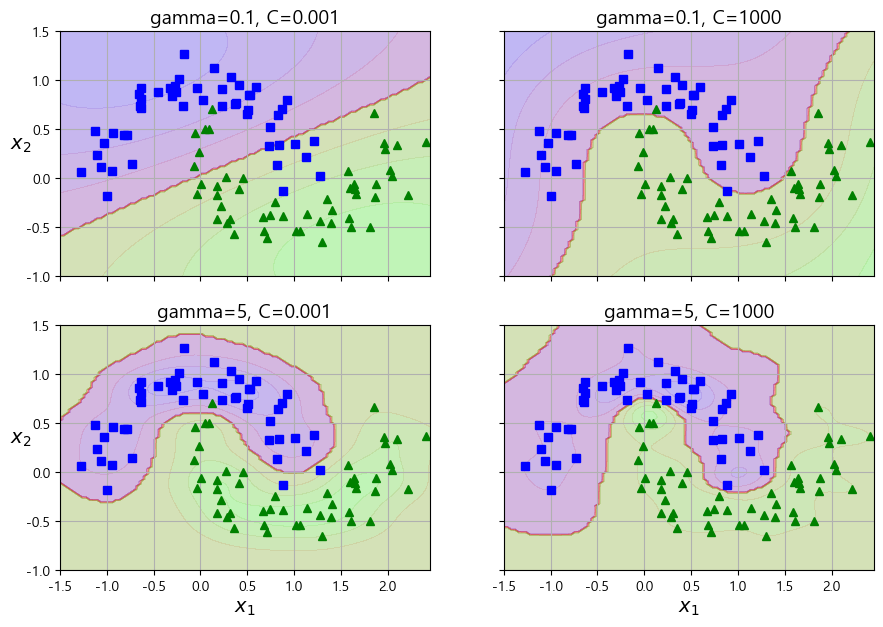

In [27]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

## 계산 복잡도 

|파이썬 클래스|시간 복잡도|외부 메모리 지원|스케일 조정 필요|커널 트릭|
|---|---|---|---|---|
|LinearSVC|$O(m \times n )$|N|Y|N|
|SVC| $O(m^2 \times n)$과 $O(m^3 \times n)$ 사이|N|Y|Y|
|SGDClassifier|$O(m \times n)$|Y|Y|N|


### LinearSVC의 계산 복잡도
- 훈련 시간 복잡도 : $O(m \times n )$
  - `liblinear` 라이브러리 기반 -> 선형 SVM을 구현하기 최적화
  - `liblinear`는 커널 트릭 지원 하지 않음 
  - 훈련 샘플과 특성 수에 거의 선형적으로 진행 
- 정밀도를 높이면 알고리즘의 수행 시간이 길어짐 
  - 허용 오차 하이퍼파라미터 $\varepsilon$로 수행 시간을 조절 할 수 있음 

### SVC 계산 복잡도
- 훈련 시간 복잡도 : $O(m^2 \times n)$과 $O(m^3 \times n)$ 사이
  - SVC는 `libsvm` 라이브러리 기반 -> 커널 트릭알고리즘을 구현
  - 훈련 샘플이 커지면 속도가 매우 느려짐 
    - 중소 규모 비선형 알고리즘에 잘 어울림 
  - `희소 특성`인 경우 확장이 잘됨 


### SGDClassifier 계산 복잡도 
- $O(m \times n)$
 - 라지 마진 분류를 수행 
 - 규제 파라미터 (`alpha` 및 `penalty`)와 `learning_rate`를 조정 -> 선형 SVM과 유사한 결과 생성 
 - 점진적 학습 가능 + 메모리 거의 사용 X -> SGD를 사용  
 - 확장성이 매우 좋음 

# 3. SVM의 회귀 
- `회귀`문제에서는 제한된 `마진 오류` 안에서 가능한 많은 샘플이 들어가도록 학습
    - 마진의 폭은 하이퍼파라미터 $\varepsilon$로 조절
    - $\varepsilon$ 감소 : 서포트 벡터 수 증가 -> 모델 규제 
      - 마진 안에 훈련 샘플이 추가되어도 모델 예측 영향 X 
      - 해당 모델은 $\varepsilon$에 민감하지 않음 

- 예시 
 - 랜덤 생성한 선형 데이터 셋 
    - 모델 1 : 작은 마진 ($\varepsilon=0.5$)
    - 모델 2 : 큰 마진 ($\varepsilon=1.2$)
                   

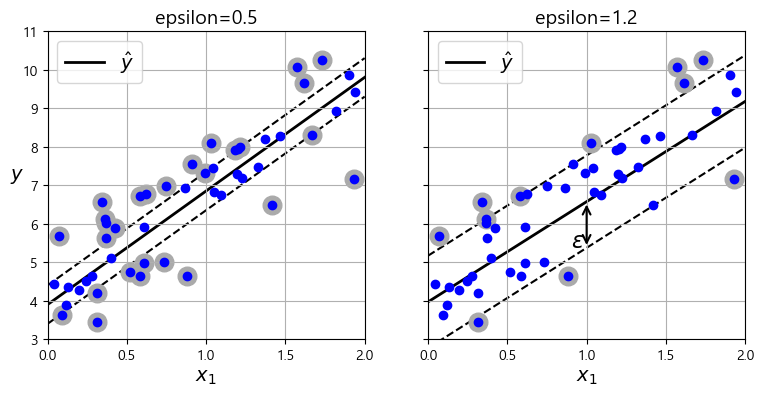

In [30]:
from sklearn.svm import LinearSVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
plt.show()

### 예시) LinearSVR로 회귀 모델 생성

In [31]:
from sklearn.svm import SVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

- 비선형 회귀 작업 처리는 위해 `커널 SVM` 모델 사용
  - 규제가 약간 있는 모델 VS 규제가 거의 없는 모델 

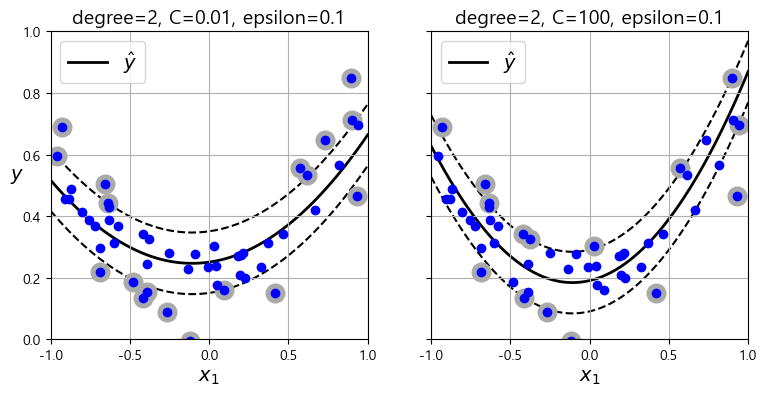

In [32]:
svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
plt.show()

# 4. SVM 이론 

## 선형 SVM 분류기 모델 
### 원리 
- 결정 함수를 계산해서 새로운 샘플 x의 클래스를 예측 
- 결과 값이 0 보다 크면 예측 클래스 $\hat{y}$는 양성 클래스/ 아니면 음성클래스 0 
  - 로지스틱회귀(Logistic Regression)와 동일함 

### 훈련 
 - 마진 오류 횟수를 제한 하면서 가능한 많은 샘플이 마진 안에 들어가도록 학습
 - 그렇게 만드는 가중치 벡터 `w`와 절편 `b`를 찾는 것
   - w는 최대한 작게 유지
   - b는 마진에 영향을 주지 못함

- 예시 : 

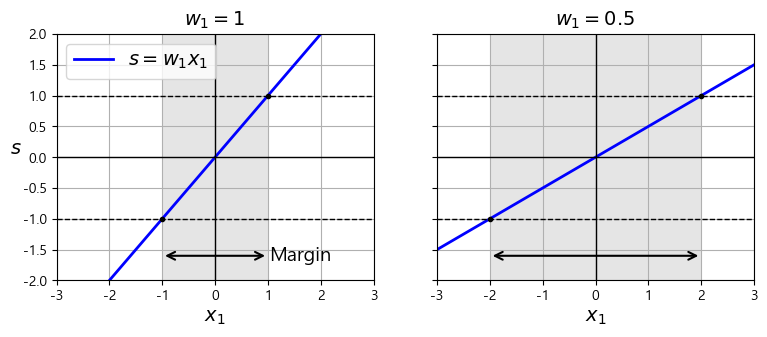

In [33]:
import matplotlib.patches as patches

def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    half_margin = 1 / w

    plt.plot(x1, y, "b-", linewidth=2, label=r"$s = w_1 x_1$")
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    rect = patches.Rectangle((-half_margin, -2), 2 * half_margin, 4,
                             edgecolor='none', facecolor='gray', alpha=0.2)
    plt.gca().add_patch(rect)
    plt.plot([-3, 3], [1, 1], "k--", linewidth=1)
    plt.plot([-3, 3], [-1, -1], "k--", linewidth=1)
    plt.plot(half_margin, 1, "k.")
    plt.plot(-half_margin, -1, "k.")
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel("$x_1$")
    if ylabel:
        plt.ylabel("$s$", rotation=0, labelpad=5)
        plt.legend()
        plt.text(1.02, -1.6, "Margin", ha="left", va="center", color="k")

    plt.annotate(
        '', xy=(-half_margin, -1.6), xytext=(half_margin, -1.6),
        arrowprops={'ec': 'k', 'arrowstyle': '<->', 'linewidth': 1.5}
    )
    plt.title(f"$w_1 = {w}$")

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.grid()
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.grid()
plt.show()

#### 왼쪽 그래프 기준 
- $w_1 = 1 $ 
- 따라서 $w_1 \cdot x_1 = -1 \text{ or } +1 $ 인 포인트는  $ x_1 = -1 \text{ or } +1 $
- 마진의 크기 : 2 

#### 오른쪽 그래프 기준 
- $w_1 = 0.5 $ 
- 따라서 $w_1 \cdot x_1 = -1 \text{ or } +1 $ 인 포인트는  $ x_1 = -2 \text{ or } +2$
- 마진의 크기 : 4


- 따라서 가능한 `w`를 작게 유지 -> 마진을 가능한 작게 유지 가능 
- 편향 b 는 마진의 크기에 영향 X (위치만 이동 ) 

#### 마진 오류 줄이기 
- 결정 함수가 모든 양성 샘플 -> 1보다 커야함 , 음성 샘플 -> -1 보다 작아야함
- 음성 샘플 $y^{(i)=0}$ 일 때, $y^{(i)=-1}$
- 양성 샘플 $y^{(i)=1}$ 일 때, $y^{(i)=+1}$
- 제약 조건 : $t^{(i)}(w^T \cdot x^{(i)}+b) >= 1$
- 하드 마진 선형 SVM 분류기의 목적 함수를 제약이 있는 최적화 문제로 표현

$$
\text{minimize}(w,b) \frac{1}{2}w^T \cdot w \\
\text{조건 : i = 1, 2, ...m 일 때, } t^{(i)}(w^Tx^{(i)}+b) >=1
$$

##### 소프트 마진 분류기 마진 최소화 
- 목적 함수를 구성하려면 `슬랙 변수` $\zeta ^{(i)} >= 0 $ 을 도입해야함 
  - `슬랙 변수` $\zeta ^{(i)} $ : i번째 샘플이 얼마나 마진을 위반 할지 정도 
  - 마진 오류 최소화하기 위해 `슬랙 변수`를 최소화  + 마진을 크게하기 위해 $\frac{1}{2}w^T \cdot w$ 가능한 작게 만들어야함 + 하이퍼 파라미터 C (트레이드 오프)
$$
\text{minimize}(w,b,\zeta) \frac{1}{2}w^T \cdot w + C \sum^m_{i=1}\zeta^{(i)}\\
\text{조건 : i = 1, 2, ...m 일 때, } t^{(i)}(w^Tx^{(i)}+b) >=1-\zeta^{(i} 이고, \zeta^{(i)} >= 0
$$

##### 콰드라틱 프로그래밍(QP)
- 선형적인 제약 조건이 있는 볼록 함수의 이차 최적화 문제 
- SVM을 훈련 시키는 방법
  -  `QP Solver`
  -  경사 하강법을 이용한 힌지 손실 혹은 제곱 힌지 손실 최소화 
  -  `쌍대 문제`


# 5. 쌍대 문제 
## 1) 쌍대문제란 ? 
- `원 문제`라고 하는 제약이 있는 최적화 문제가 주어지면 `쌍대 문제`라고 하는 관련된 문제로 표현 가능 
- `쌍대 문제`의 해는 `원 문제`의 해의 하안 값 혹은 특정 조건에서는 동일한 해를 가짐 
- 식을 최소화하는 벡터 $\hat{\alpha}$를 찾아서, 원 문제를 최소화 하는 $\hat{w} , \hat{b}$를 계산 
- 훈련 샘플수가 특성 개수보다 작을 때, 원 문제보다는 쌍대 문제를 푸는게 나음 
- 쌍대 문제에서는 `커널 트릭`이 사용 가능 

## 2) 커널 SVM
- 예시 : 2차 다항식 매핑 함수 $\phi$ 
- $\phi(x) = \phi=\begin{pmatrix}\begin{pmatrix}x_1\\x_2\end{pmatrix}\end{pmatrix} \begin{pmatrix} x_1^2\\ \sqrt{2} x_1  x_2 \\ x_2^2 \end{pmatrix}$
- 벡터가 2차원이 아닌 3차원이 됨

- a와 b에 2차 다항식 매핑 적용 후 변환된 벡터 점곱 수행 -> 원래 벡터의 제곱과 동일 
$$
\phi(a)^T \phi(b) \\
= \begin{pmatrix} a_1^2\\ \sqrt{2} a_1  a_2 \\ a_2^2 \end{pmatrix} \begin{pmatrix} b_1^2\\ \sqrt{2} b_1  b_2 \\ b_2^2 \end{pmatrix} \\
= (a_1b_1 + a_2b_2)^2 = \begin{pmatrix}\begin{pmatrix}a_1\\a_2\end{pmatrix}^T\begin{pmatrix}b_1 \\ b_2 \end{pmatrix}\end{pmatrix}^2\\
 = (a^Tb)^2
$$

- 모든 샘플에 대해서 변환 $\phi$를 적용하면 쌍대 문제에 점곱이 포함 
- $\phi$가 2차 다항식의 변환이라면 벡터의 점곱을 $(x^{(i)}x^{(j)})^2$로 표현 가능  
- -> 실제 훈련 샘플 변환이 불 필요
- 전체 과정의 필요한 계산량이 효율적으로 변함 -> `커널 트릭`